https://colab.research.google.com/drive/1rMdZoEr-oJNjjvDEgNQAQwbzyo7avi_P?usp=sharing

# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

5 6
11

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

8 5
13


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

6 
5
8
5 8 
^C


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
%%writefile stressTest.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cstdlib>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

long long MaxPairwiseProductFast(const std::vector<int>& numbers){
  int n = numbers.size();

  int max_index1 = -1;
  for(int i = 0; i < n; ++i){
    if ((max_index1 == -1) || (numbers[i]>numbers[max_index1]))
      max_index1 = i;
  }

  int max_index2 = -1;
  for(int j = 0; j < n;++j)
    if ((j != max_index1) && ((max_index2 == -1) || (numbers[j]>numbers[max_index2])))
      max_index2= j;

  return ((long long)(numbers[max_index1]))*numbers[max_index2];
}

int main() {
    int k = 0;
    while(k < 20){
      int n = rand() % 20 + 2;
      std::cout << n << '\n';
      std::vector<int> a;
      for(int i = 0; i < n; ++i){
        a.push_back(rand() % 100000);
      }
      for(int i = 0; i < n; ++i){
        std::cout << a[i] << ' ';
      }
      std::cout << "\n";
      long long res1 = MaxPairwiseProduct(a);
      long long res2 = MaxPairwiseProductFast(a);
      if (res1 != res2){
        std::cout << "Wrong answer: " << res1 << ' ' << res2 << "\n";
        break;
      }
      else {
        std::cout << "ok\n";
      }
      ++k;
    }
    /*
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }
    
    std::cout << MaxPairwiseProduct(numbers) << "\n";
    */
    return 0;
}


Writing stressTest.cpp


In [ ]:
!g++ stressTest.cpp -o stressTest
!./stressTest


5
30886 92777 36915 47793 38335 
ok
8
60492 16649 41421 2362 90027 68690 20059 97763 
ok
8
80540 83426 89172 55736 5211 95368 2567 56429 
ok
4
21530 22862 65123 74067 
ok
17
13929 79802 34022 23058 33069 98167 61393 18456 75011 78042 76229 77373 84421 44919 13784 98537 75198 
ok
6
98315 64370 66413 3526 76091 68980 
ok
18
41873 6862 99170 6996 97281 2305 20925 77084 36327 60336 26505 50846 21729 61313 25857 16124 53895 19582 
ok
7
98814 33367 15434 90364 44043 13750 71087 
ok
10
17276 47178 95788 93584 5403 2651 92754 12399 99932 95060 
ok
18
93368 47739 10012 36226 98586 48094 97539 40795 80570 51434 60378 97467 66601 10097 12902 73317 70492 26652 
ok
18
97301 60280 24286 9441 53865 29689 28444 46619 58440 44729 58031 8117 38097 5771 34481 90675 20709 98927 
ok
9
77856 79497 72353 54586 76965 55306 64683 6219 28624 
ok
10
32871 5732 48829 9503 30019 58270 63368 59708 86715 26340 
ok
11
47796 723 42618 2245 22846 93451 92921 43555 92379 97488 37764 
ok
10
69841 92350 65193 41500 57034 

### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000

real	2m18.563s
user	2m17.499s
sys	0m0.031s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                           //1
    std::vector<int> numbers(n);          //n                                  
    for (int i = 0; i < n; ++i) {         //1+2n                                  
        std::cout << numbers[i];          //n                                 
    }

    std::cout << "\n";                    //1   
    return 0;                                                              
}                                         //1+n+1+2n+2+1  = O(n)

Writing test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        //if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Overwriting max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

289
116
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

[link text](https://)Add in each line a coment with the number of intstrcution that are executed in that line

In [ ]:
%%writefile MaxPairwiseProductFast.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cstdlib>

long long MaxPairwiseProductFast(const std::vector<int>& numbers){                      
  int n = numbers.size();                                                                 //1
  int max_index1 = -1;                                                                    //1
  for(int i = 0; i < n; ++i){                                                             //1+n
    if ((max_index1 == -1) || (numbers[i]>numbers[max_index1]))                           //2n
      max_index1 = i;                                                                     //[1,n]
  }                                                                                       //total = 3 + 3n + [1,n]

  int max_index2 = -1;                                                                    //1
  for(int j = 0; j < n;++j)                                                               //1+n
    if ((j != max_index1) && ((max_index2 == -1) || (numbers[j]>numbers[max_index2])))    //n
      max_index2= j;                                                                      //[1,n]

  return ((long long)(numbers[max_index1]))*numbers[max_index2];                          //3      
}                                                                                         //total = 5 + 2n + [1,n]

int main() {
    int n;                                                                                //1
    std::cin >> n;                                                                        //1
    std::vector<int> numbers(n);                                                          //1
    for (int i = 0; i < n; ++i) {                                                         //1+n
        std::cin >> numbers[i];                                                           //n  
    }
    
    std::cout << MaxPairwiseProductFast(numbers) << "\n";                                     //1

    return 0;                                                                             //complexidad O(n)
}

Overwriting MaxPairwiseProductFast.cpp


Test with inputs 1 and 2



In [ ]:
!g++ MaxPairwiseProductFast.cpp -o MaxPairwiseProductFast
!./MaxPairwiseProductFast < input1.txt
!./MaxPairwiseProductFast < input2.txt



90
40000000000


Test and time it with input 3

In [ ]:
!time ./MaxPairwiseProductFast < input3.txt


39999800000

real	0m0.064s
user	0m0.060s
sys	0m0.001s


20 stress tests

In [ ]:
%%writefile stressTest.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cstdlib>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

long long MaxPairwiseProductFast(const std::vector<int>& numbers){
  int n = numbers.size();

  int max_index1 = -1;
  for(int i = 0; i < n; ++i){
    if ((max_index1 == -1) || (numbers[i]>numbers[max_index1]))
      max_index1 = i;
  }

  int max_index2 = -1;
  for(int j = 0; j < n;++j)
    if ((j != max_index1) && ((max_index2 == -1) || (numbers[j]>numbers[max_index2])))
      max_index2= j;

  return ((long long)(numbers[max_index1]))*numbers[max_index2];
}

int main() {
    int k = 0;
    while(k < 20){
      int n = rand() % 20 + 2;
      std::cout << n << '\n';
      std::vector<int> a;
      for(int i = 0; i < n; ++i){
        a.push_back(rand() % 100000);
      }
      for(int i = 0; i < n; ++i){
        std::cout << a[i] << ' ';
      }
      std::cout << "\n";
      long long res1 = MaxPairwiseProduct(a);
      long long res2 = MaxPairwiseProductFast(a);
      if (res1 != res2){
        std::cout << "Wrong answer: " << res1 << ' ' << res2 << "\n";
        break;
      }
      else {
        std::cout << "ok\n";
      }
      ++k;
    }
    /*
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }
    
    std::cout << MaxPairwiseProduct(numbers) << "\n";
    */
    return 0;
}


Overwriting stressTest.cpp


In [ ]:
!g++ stressTest.cpp -o stressTest
!./stressTest

5
30886 92777 36915 47793 38335 
ok
8
60492 16649 41421 2362 90027 68690 20059 97763 
ok
8
80540 83426 89172 55736 5211 95368 2567 56429 
ok
4
21530 22862 65123 74067 
ok
17
13929 79802 34022 23058 33069 98167 61393 18456 75011 78042 76229 77373 84421 44919 13784 98537 75198 
ok
6
98315 64370 66413 3526 76091 68980 
ok
18
41873 6862 99170 6996 97281 2305 20925 77084 36327 60336 26505 50846 21729 61313 25857 16124 53895 19582 
ok
7
98814 33367 15434 90364 44043 13750 71087 
ok
10
17276 47178 95788 93584 5403 2651 92754 12399 99932 95060 
ok
18
93368 47739 10012 36226 98586 48094 97539 40795 80570 51434 60378 97467 66601 10097 12902 73317 70492 26652 
ok
18
97301 60280 24286 9441 53865 29689 28444 46619 58440 44729 58031 8117 38097 5771 34481 90675 20709 98927 
ok
9
77856 79497 72353 54586 76965 55306 64683 6219 28624 
ok
10
32871 5732 48829 9503 30019 58270 63368 59708 86715 26340 
ok
11
47796 723 42618 2245 22846 93451 92921 43555 92379 97488 37764 
ok
10
69841 92350 65193 41500 57034 

Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile MaxPairwiseProductFastexecint.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cstdlib>

long long MaxPairwiseProductFast(const std::vector<int>& numbers, long long &execints){                      
  int n = numbers.size();                                                                 //1
  execints++;

  int max_index1 = -1;                                                                    //1
  execints++;

  execints++;
  for(int i = 0; i < n; ++i){                                                             //1+2n
    execints += 2;

    execints += 2;
    if ((max_index1 == -1) || (numbers[i]>numbers[max_index1]))                           //2n
      max_index1 = i;                                                                     //[1,n]
      execints++;
  }                                                                                       //total = 3 + 4n + [1,n]

  int max_index2 = -1;                                                                    //1
  execints++;

  execints++;
  for(int j = 0; j < n;++j){                                                              //1+2n
    execints += 2;
    execints += 3;
    if ((j != max_index1) && ((max_index2 == -1) || (numbers[j]>numbers[max_index2])))    //[2n,3n]
      max_index2= j;                                                                      //[1,n]
      execints++;
  }
  execints+=3;
  return ((long long)(numbers[max_index1]))*numbers[max_index2];                          //3      
}                                                                                         //total = 5 + 2n + [2n,3n] + [1,n]

int main() {
    long long execints =0LL;
    int n;                                                                                //1
    execints++;
    std::cin >> n;                                                                        //1
    execints++;
    std::vector<int> numbers(n);                                                          //1
    execints++;
    execints++;
    for (int i = 0; i < n; ++i) {                                                         //1+2n
        execints+=2;
        std::cin >> numbers[i];                                                           //n 
        execints++;
                                                                  
    }
                                                                                          //total =  4 + 3n
    std::cout << MaxPairwiseProductFast(numbers,execints) << "\n";  
    execints++;                                                                           //1
    std::cout << "instructions executed: " << execints << "\n";
   //std::cout <<  execints << "\n";                       
                                                                                          //13 + 9n + [2n,3n] + [1,n] + [1,n]
    return 0;                                                                             //complexidad O(n)
}

Overwriting MaxPairwiseProductFastexecint.cpp


In [ ]:
!g++ MaxPairwiseProductFastexecint.cpp -o MaxPairwiseProductFastexecint
!./MaxPairwiseProductFastexecint < input1.txt
!./MaxPairwiseProductFastexecint < input2.txt
!./MaxPairwiseProductFastexecint < input3.txt

90
instructions executed: 153
40000000000
instructions executed: 97
39999800000
instructions executed: 2800013


Calculate estimated time by instruction and number of instructions by second

In [ ]:
0.0064/2800013

2.285703673518659e-09

In [ ]:
1/(0.0064/2800013)

437502031.24999994

### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [ ]:
%%writefile max_pairwise_product_super.cpp
#include <iostream>

int main() {
    int n;                                            //1
    std::cin >> n;                                    //1

    long long max1 = -1, max2 = -1;                   //2          
    for (int i = 0; i < n; ++i) {                     //1+2n
        long long num;                                //n
        std::cin >> num;                              //n+1

        if (num > max1) {                             //n
            max2 = max1;                              //n
            max1 = num;                               //n
        } else if (num > max2) {                      //n 
            max2 = num;                               //n
        }
    }

    long long max_product = max1 * max2;               //1
    std::cout << max_product << std::endl;             //2

    return 0;
}


Overwriting max_pairwise_product_super.cpp


Test with inputs 1 and 2


 

In [ ]:
!g++ max_pairwise_product_super.cpp -o max_pairwise_product_super
!./max_pairwise_product_super < input1.txt
!./max_pairwise_product_super < input2.txt

90
40000000000


Test and time it with input 3

In [ ]:
!time ./max_pairwise_product_super < input3.txt

39999800000

real	0m0.057s
user	0m0.054s
sys	0m0.002s


20 stress tests 

In [ ]:
%%writefile super_stress_test.cpp
#include <iostream>
#include <cstdlib>
#include <ctime>
#include <vector>

long long max_pairwise_product(int n, const std::vector<long long>& numbers) {
    long long max1 = -1, max2 = -1;
    for (int i = 0; i < n; ++i) {
        long long num = numbers[i];

        if (num > max1) {
            max2 = max1;
            max1 = num;
        } else if (num > max2) {
            max2 = num;
        }
    }

    return max1 * max2;
}

int main() {
    const int num_tests = 20;
    const int max_n = 11;
    const long long max_element = 100;

    std::srand(std::time(0));

    for (int test = 1; test <= num_tests; ++test) {
        int n = std::rand() % max_n + 1;
        std::vector<long long> numbers(n);

        for (int i = 0; i < n; ++i) {
            numbers[i] = std::rand() % max_element;
        }

        long long max_product = max_pairwise_product(n, numbers);
        std::cout << "Test " << test << ": Max pairwise product = " << max_product << std::endl;
    }

    return 0;
}


Overwriting super_stress_test.cpp


In [ ]:
!g++ super_stress_test.cpp -o super_stress_test
!./super_stress_test

Test 1: Max pairwise product = 8835
Test 2: Max pairwise product = 6370
Test 3: Max pairwise product = 7476
Test 4: Max pairwise product = 6984
Test 5: Max pairwise product = 598
Test 6: Max pairwise product = 96
Test 7: Max pairwise product = 2209
Test 8: Max pairwise product = 4505
Test 9: Max pairwise product = 5986
Test 10: Max pairwise product = 5760
Test 11: Max pairwise product = -95
Test 12: Max pairwise product = 5040
Test 13: Max pairwise product = 3016
Test 14: Max pairwise product = 8836
Test 15: Max pairwise product = 9312
Test 16: Max pairwise product = 7125
Test 17: Max pairwise product = 5550
Test 18: Max pairwise product = 7896
Test 19: Max pairwise product = 7225
Test 20: Max pairwise product = 3233


Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
%%writefile max_pairwise_product_super_exec.cpp
#include <iostream>

int main() {
    long long execints=0LL;
    int n;                                            //1
    execints++;
    std::cin >> n;                                    //1
    execints++;

    long long max1 = -1, max2 = -1;                   //2   
    execints+=2;       
    execints++;
    for (int i = 0; i < n; ++i) {                     //1+2n
        execints+=2;
        long long num;                                //n
        execints++;
        std::cin >> num;                              //n
        execints++;
        execints++;
        if (num > max1) {                             //n
            execints++;
            max2 = max1;                              //n
            execints++;
            max1 = num;                               //n
            execints++;
        } else if (num > max2) {                      //n 
            execints++;
            max2 = num;                               //n
        }
    }

    long long max_product = max1 * max2;               //1
    execints++;
    std::cout << max_product << std::endl;             //2
    execints+=2;
    std::cout << "instructions executed: " << execints << "\n";

    return 0;
}

Writing max_pairwise_product_super_exec.cpp


In [ ]:
!g++ max_pairwise_product_super_exec.cpp -o max_pairwise_product_super_exec
!./max_pairwise_product_super_exec < input1.txt
!./max_pairwise_product_super_exec < input2.txt
!./max_pairwise_product_super_exec < input3.txt

90
instructions executed: 88
40000000000
instructions executed: 49
39999800000
instructions executed: 1600008


Calculate estimated time by instruction and number of instructions by second

In [ ]:
!time ./max_pairwise_product_super_exec < input3.txt

39999800000
instructions executed: 1600008

real	0m0.061s
user	0m0.058s
sys	0m0.002s


In [ ]:
0.0061/1600008

3.8124809375953124e-09

In [ ]:
1/(0.0061/1600008)

262296393.44262293

# Codeforces problem https://codeforces.com/contest/1619/problem/A 

Solve the problem in Colab, submit the solution to Codeforces and add a screenshoot of the submission.

In [ ]:
%%writefile is_square.cpp
#include <iostream>
#include <string>

bool is_square(const std::string& s) {
    int len = s.length();
    if (len % 2 != 0) {
        return false;
    }

    int mid = len / 2;
    for (int i = 0; i < mid; ++i) {
        if (s[i] != s[mid + i]) {
            return false;
        }
    }

    return true;
}

int main() {
    int t;
    std::cin >> t;

    for (int i = 0; i < t; ++i) {
        std::string s;
        std::cin >> s;

        if (is_square(s)) {
            std::cout << "YES" << std::endl;
        } else {
            std::cout << "NO" << std::endl;
        }
    }

    return 0;
}


Writing is_square.cpp


In [ ]:

%%writefile tests.txt
10
a
aa
aaa
aaaa
abab
abcabc
abacaba
xxyy
xyyx
xyxy

Writing tests.txt


In [ ]:
!g++ is_square.cpp -o is_square
!./is_square < tests.txt

NO
YES
NO
YES
YES
YES
NO
NO
NO
YES


In [ ]:
!g++ -v

Using built-in specs.
COLLECT_GCC=g++
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/9/lto-wrapper
OFFLOAD_TARGET_NAMES=nvptx-none:hsa
OFFLOAD_TARGET_DEFAULT=1
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 9.4.0-1ubuntu1~20.04.1' --with-bugurl=file:///usr/share/doc/gcc-9/README.Bugs --enable-languages=c,ada,c++,go,brig,d,fortran,objc,obj-c++,gm2 --prefix=/usr --with-gcc-major-version-only --program-suffix=-9 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx-abi=new --enable-gnu-unique-object --disable-vtable-verify --enable-plugin --enable-default-pie --with-system-zlib --with-target-system-zlib=auto --enable-objc-gc=auto --enable-multiarch --disable-werror --with-arch-32=i686 --with-abi=m64 --with-multilib-list=m32,m

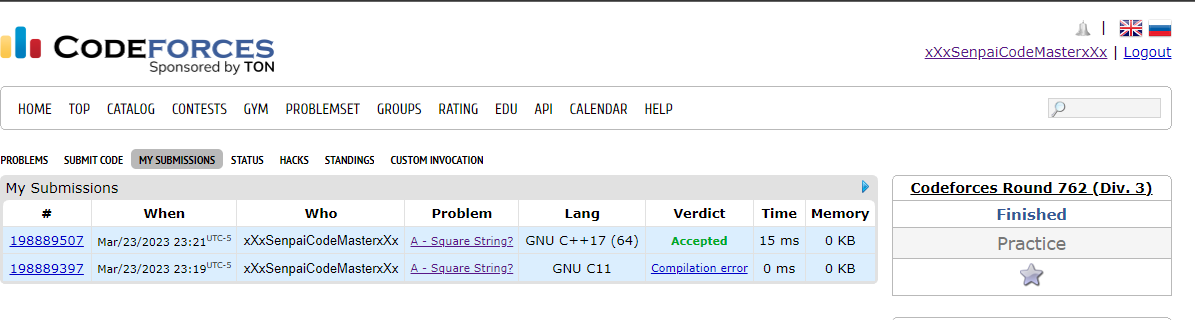

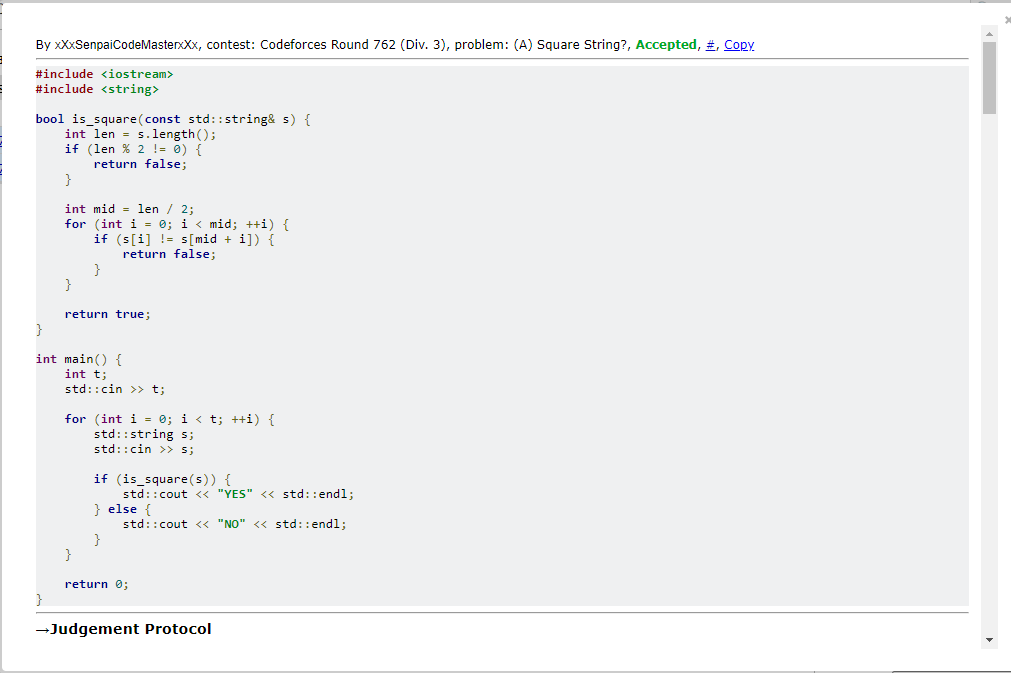